In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 1. Data Loading and Scope
- Dataset description
- Project objectives
- Definition of prediction tasks (regression, classification, clustering)

## 2. Data Cleaning
- Data types and missing values
- Date processing and feature creation (Age, Tenure)
- Handling obvious inconsistencies
- Initial sanity checks

## 3. Exploratory Data Analysis – General Customer Profile
- Univariate distributions of key numerical features
- Categorical feature distributions
- Initial observations on spending, income, age, and tenure

## 4. Regression Modeling – TotalSpend Prediction

### 4.1 Exploratory Analysis for Regression (EDA – Spending Drivers)
- Correlation analysis
- Bivariate relationships with TotalSpend
- Behavioral vs demographic drivers
- Summary observations

### 4.2 Feature Engineering
- Transformations (log, scaling)
- Feature selection and aggregation
- Preparation for regression models

### 4.3 Model Training and Evaluation
- Baseline models
- Regularized linear models
- Tree-based models
- Performance comparison

## 5. Classification Modeling – Campaign Response Prediction

### 5.1 Exploratory Analysis for Classification
- Response distribution and imbalance
- Key drivers of campaign response

### 5.2 Feature Engineering
- Encoding and balancing strategies

### 5.3 Model Training and Evaluation
- Classification models
- Metrics and comparison

## 6. Customer Segmentation – Clustering Analysis

### 6.1 Preprocessing and Feature Selection
- Scaling and dimensionality considerations

### 6.2 Clustering Models
- K-Means and alternatives

### 6.3 Cluster Profiling and Interpretation
- Behavioral and demographic characteristics

## 7. Summary and Key Insights
- Cross-model findings
- Business implications


## 1. Data Loading and Scope
- Dataset description
- Project objectives
- Definition of prediction tasks (regression, classification, clustering)

In [103]:
df = pd.read_csv('Data/marketing_campaign.csv',sep='\t')

In [104]:
df.shape

(2240, 29)

In [105]:
df.columns
#print("Columns:", list(df.columns))

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [106]:
print("\n=== HEAD (first 5 rows) ===")
df.head()


=== HEAD (first 5 rows) ===


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [107]:
print("\n=== INFO ===")
df.info()


=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    224

In [108]:
print("\n=== DESCRIBE (numeric) ===")
display(df.select_dtypes(include="number").describe().T)


=== DESCRIBE (numeric) ===


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [109]:
df['ID'].nunique()

2240

In [110]:
print("\n=== NULL COUNTS (top) ===")
display(df.isna().sum().sort_values(ascending=False).head(20))


=== NULL COUNTS (top) ===


Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
dtype: int64

In [111]:
obj_cols = df.select_dtypes(include="object").columns.tolist()
card = {c: df[c].nunique(dropna=True) for c in obj_cols}
print("\n=== OBJECT COLUMNS & UNIQUE COUNTS ===")
for k, v in sorted(card.items(), key=lambda x: -x[1])[:20]:
    print(f"{k:25s} : {v}")


=== OBJECT COLUMNS & UNIQUE COUNTS ===
Dt_Customer               : 663
Marital_Status            : 8
Education                 : 5


In [112]:
# (Optional) quick value_counts for common fields if they exist
for c in ["Marital_Status", "Education", "Response", "Complain"]:
    if c in df.columns:
        print(f"\n=== VALUE COUNTS: {c} ===")
        display(df[c].value_counts(dropna=False).head(20))


=== VALUE COUNTS: Marital_Status ===


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


=== VALUE COUNTS: Education ===


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


=== VALUE COUNTS: Response ===


Response
0    1906
1     334
Name: count, dtype: int64


=== VALUE COUNTS: Complain ===


Complain
0    2219
1      21
Name: count, dtype: int64

## 2. Data Cleaning
- Data types and missing values
- Date processing and feature creation (Age, Tenure, TotalSpend)
- Handling obvious inconsistencies
- Initial sanity checks

In [113]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [114]:
df['Dt_Customer'] = pd.to_datetime( df['Dt_Customer'], dayfirst=True )


In [115]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [116]:
reference_year = df['Dt_Customer'].dt.year.max()
df['Age'] = reference_year - df['Year_Birth']

In [117]:
df['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [118]:
df[df['Age'] > 100][['Year_Birth', 'Age']].head()


,Year_Birth,Age
192,1900,114
239,1893,121
339,1899,115


**Observation**
A small number of customers were identified with very high ages (above 100 years), corresponding to birth years in the late 19th century.
These observations were retained at this stage and will be revisited during modeling if necessary.

In [119]:
df['Marital_Status'] = df['Marital_Status'].replace(
    ['Alone', 'Absurd', 'YOLO'],
    'Other'
)


In [120]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64

Rare and non-informative categories in Marital_Status were grouped into an Other category to reduce noise while preserving meaningful classes.

In [121]:
# Check missing income rows
df[df['Income'].isna()].shape


(24, 30)

In [122]:
# Inspect missing income cases
df.loc[df['Income'].isna(), ['Education', 'Marital_Status', 'Age']].head(10)


,Education,Marital_Status,Age
10,Graduation,Married,31
27,Graduation,Single,28
43,PhD,Single,55
48,Graduation,Single,63
58,Graduation,Single,32
71,2n Cycle,Married,41
90,PhD,Married,57
91,Graduation,Single,57
92,Master,Together,41
128,PhD,Married,53


In [123]:
# Inspect extreme income values
df[['Income']].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [124]:
# High income outliers
df[df['Income'] > 200_000][['Income', 'Education', 'Age']].sort_values('Income', ascending=False)


,Income,Education,Age
2233,666666.0,Graduation,37


The Income variable contained a small number of missing values.
These were imputed using the median income to reduce sensitivity to extreme values and preserve the overall distribution.

In [125]:
# Median imputation for Income
income_median = df['Income'].median()
df['Income'] = df['Income'].fillna(income_median)


In [126]:
df['Income'].isna().sum()


np.int64(0)

The Income variable contained a small number of missing values.
These were imputed using the median income to reduce sensitivity to extreme values and preserve the overall distribution.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [128]:
reference_date = df['Dt_Customer'].max()
reference_date


Timestamp('2014-06-29 00:00:00')

In [129]:
# Create customer tenure in days
df['Tenure_Days'] = (reference_date - df['Dt_Customer']).dt.days


In [130]:
df['Tenure_Days'].describe()


count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Tenure_Days, dtype: float64

In [132]:
education_map = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

df['Education_Level'] = df['Education'].map(education_map)


In [133]:
df[['Education', 'Education_Level']].drop_duplicates().sort_values('Education_Level')


,Education,Education_Level
11,Basic,1
19,2n Cycle,2
0,Graduation,3
5,Master,4
4,PhD,5


Education was treated as an ordinal variable and mapped to a numeric scale from 1 (Basic) to 5 (PhD) to preserve the inherent educational hierarchy.

In [135]:
# Create TotalSpend feature
spend_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

df['TotalSpend'] = df[spend_cols].sum(axis=1)


In [136]:
df['TotalSpend'].describe()


count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalSpend, dtype: float64

Total customer spending was calculated by aggregating expenditures across all product categories.


## 3. Exploratory Data Analysis – General Customer Profile
- Univariate distributions of key numerical features
- Categorical feature distributions
- Initial observations on spending, income, age, and tenure


In [137]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Tenure_Days', 'Education_Level', 'TotalSpend'],
      dtype='object')

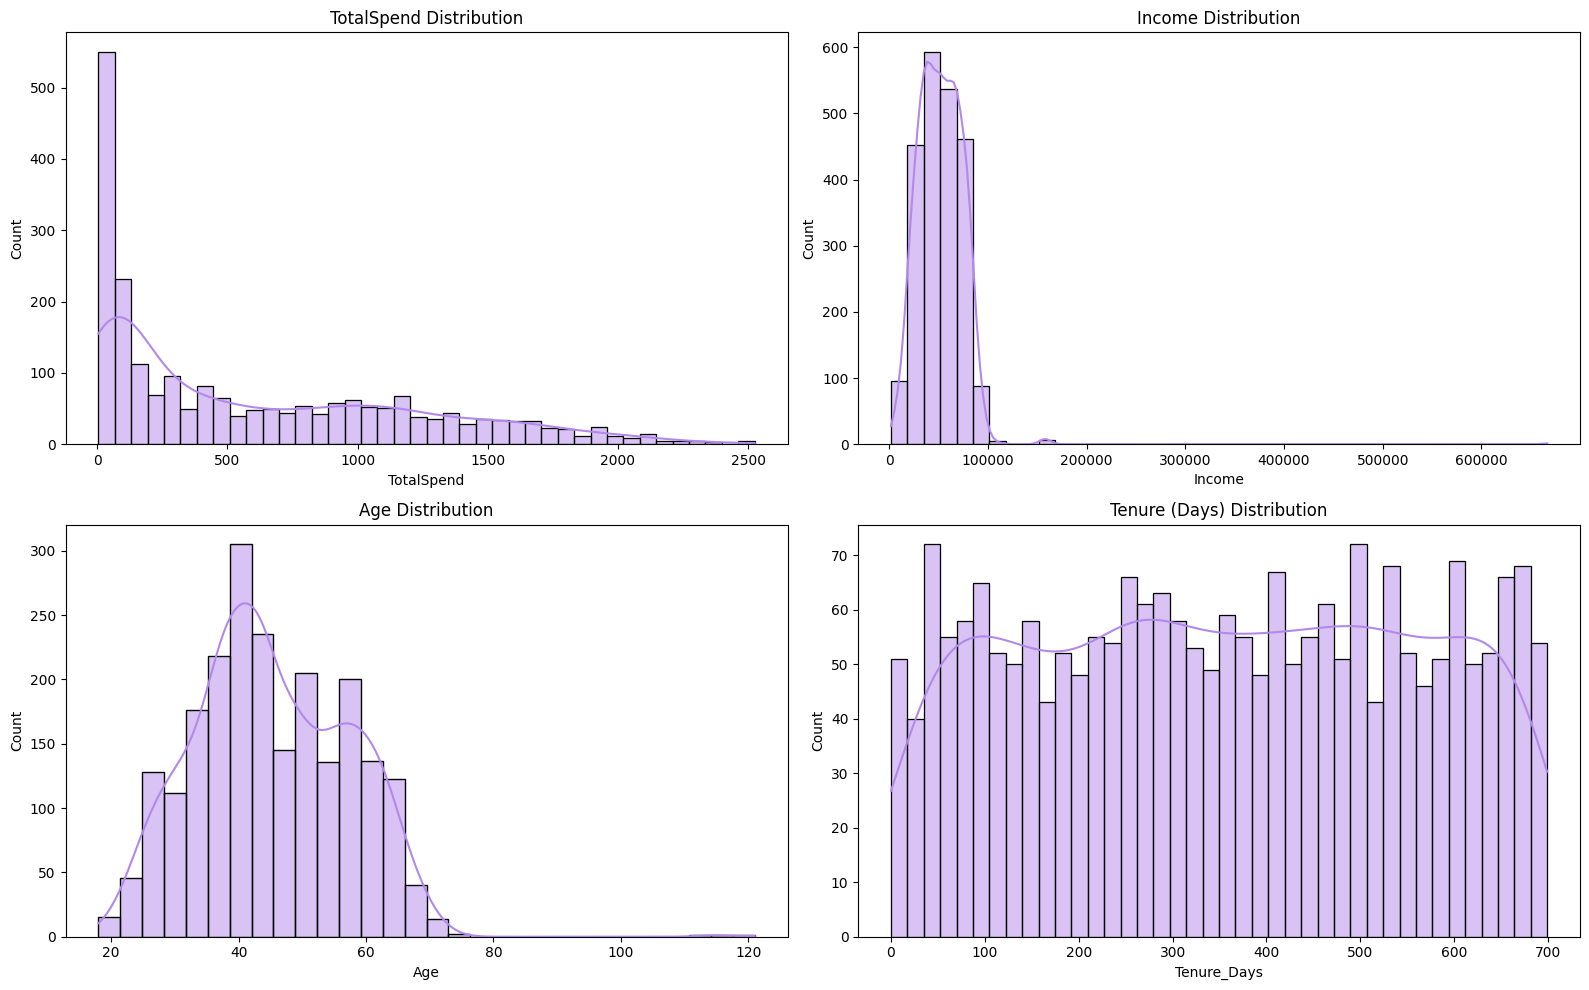

In [138]:

# Set style and color
color = '#B388EB'
plt.figure(figsize=(16, 10))

# 1) TotalSpend
plt.subplot(2, 2, 1)
sns.histplot(df['TotalSpend'], bins=40, kde=True, color=color)
plt.title('TotalSpend Distribution')

# 2) Income
plt.subplot(2, 2, 2)
sns.histplot(df['Income'], bins=40, kde=True, color=color)
plt.title('Income Distribution')

# 3) Age
plt.subplot(2, 2, 3)
sns.histplot(df['Age'], bins=30, kde=True, color=color)
plt.title('Age Distribution')

# 4) Tenure_Days
plt.subplot(2, 2, 4)
sns.histplot(df['Tenure_Days'], bins=40, kde=True, color=color)
plt.title('Tenure (Days) Distribution')

plt.tight_layout()
plt.show()


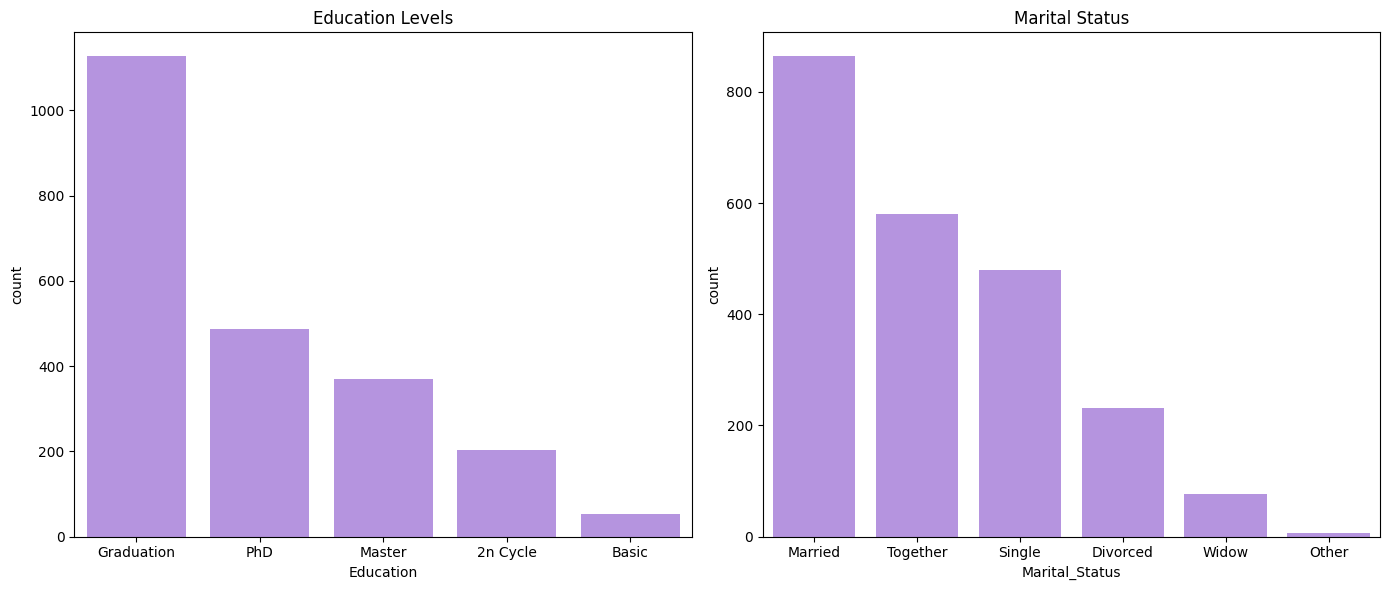

In [139]:
# Set figure
plt.figure(figsize=(14, 6))

# 1) Education
plt.subplot(1, 2, 1)
sns.countplot(
    x=df['Education'],
    order=df['Education'].value_counts().index,
    color=color
)
plt.title('Education Levels')

# 2) Marital_Status
plt.subplot(1, 2, 2)
sns.countplot(
    x=df['Marital_Status'],
    order=df['Marital_Status'].value_counts().index,
    color=color
)
plt.title('Marital Status')

plt.tight_layout()
plt.show()


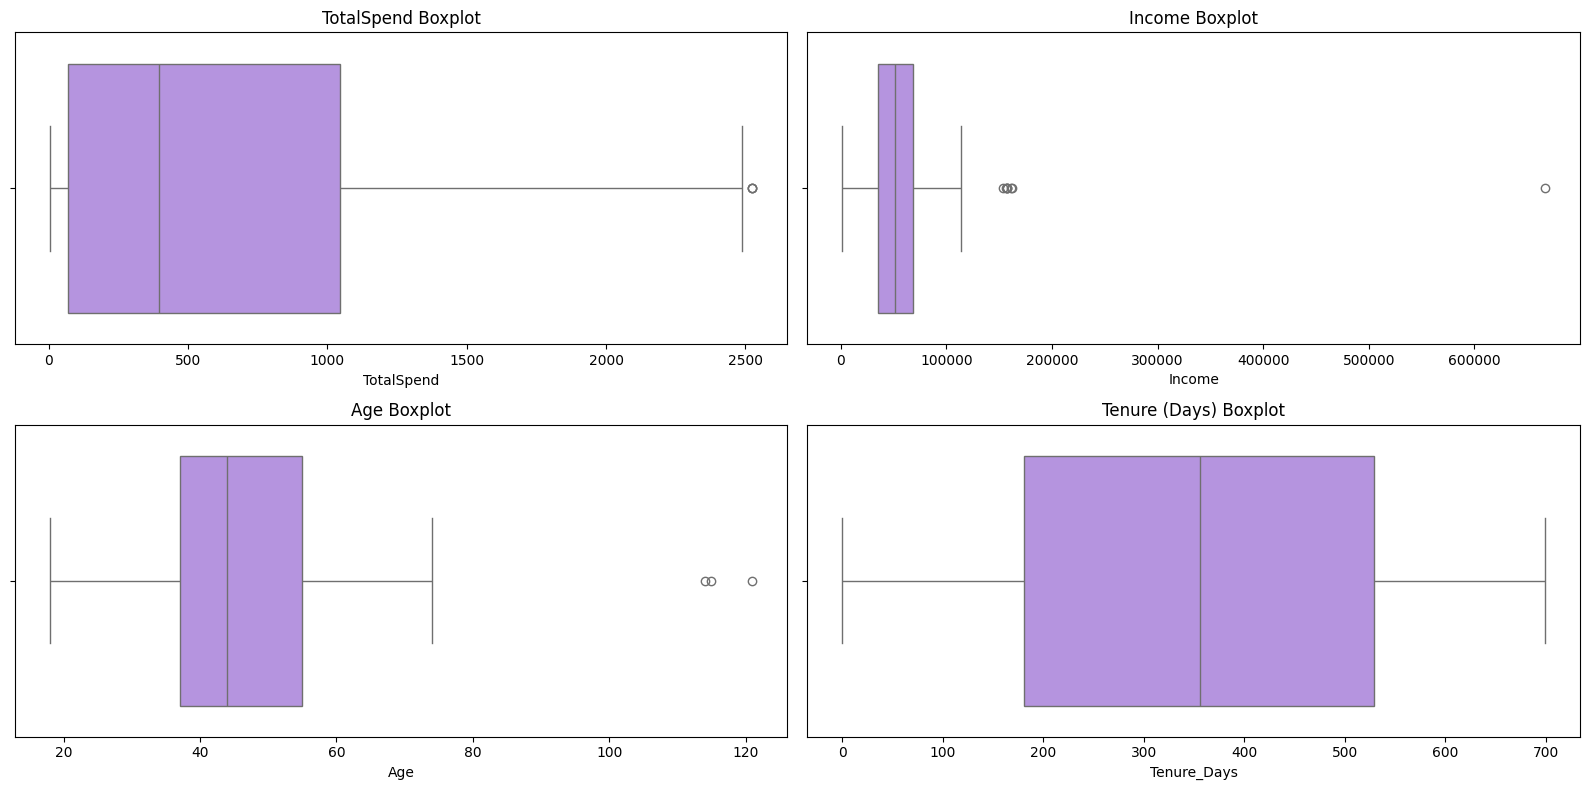

In [140]:

color = '#B388EB'

plt.figure(figsize=(16, 8))

# 1) TotalSpend
plt.subplot(2, 2, 1)
sns.boxplot(x=df['TotalSpend'], color=color)
plt.title('TotalSpend Boxplot')

# 2) Income
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Income'], color=color)
plt.title('Income Boxplot')

# 3) Age
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Age'], color=color)
plt.title('Age Boxplot')

# 4) Tenure_Days
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Tenure_Days'], color=color)
plt.title('Tenure (Days) Boxplot')

plt.tight_layout()
plt.show()


**Observation**
The numerical features TotalSpend and Income exhibit strong right-skewness and clear extreme values, indicating the presence of heavy-spender and high-income customers.

Based on these distributions, logarithmic transformation followed by standardization will be considered in later stages when applying distance-based clustering methods such as K-Means, in order to reduce the influence of extreme values.

Other numerical variables, such as Age and Customer Tenure, show more stable distributions and primarily require scaling rather than transformation.

Categorical variables do not exhibit skewness in the traditional numerical sense and are therefore better analyzed through distributional comparisons across clusters rather than numerical feature importance.

Given the multi-objective nature of the project (regression, classification, and clustering), the exploratory data analysis was conducted in a staged manner.
The initial EDA focused on understanding the overall customer profile and spending behavior, while target-specific and task-oriented analyses were deferred to later sections.

### EDA 1 – General Customer Profile  ✅

### EDA 2 – Spending Drivers (Regression) 

### EDA 3 – Campaign Response Analysis (Classification) ⏳

### EDA 4 – Customer Segmentation Prep (Clustering) ⏳


## 4. Regression Modeling – TotalSpend Prediction

### 4.0 Framework & Evaluation Setup

In [168]:
# ============================================
# 📊 Regression Model Logger (Global Framework)
# ============================================

import pandas as pd

# Initialize model log once

model_log = []


def _rnd(x, n):
    """Round numeric values safely."""
    return round(float(x), n) if x is not None else None


def log_model_result(
    name,
    r2_train,
    r2_test,
    mse_train,
    mse_test,
    r2_cv=None,
    feature_count=None,
    notes=None
):
    """
    Append one regression model result to the global model_log.
    Prevents duplicate model names.
    """
    global model_log

    if any(entry["Model"] == name for entry in model_log):
        return

    model_log.append({
        "Model": name,
        "R²_train": _rnd(r2_train, 3),
        "R²_test": _rnd(r2_test, 3),
        "R²_CV": _rnd(r2_cv, 3) if r2_cv is not None else None,
        "MSE_train": _rnd(mse_train, 2),
        "MSE_test": _rnd(mse_test, 2),
        "Feature_count": int(feature_count) if feature_count is not None else None,
        "Notes": notes
    })


def get_model_summary(sort_by="R²_test", ascending=False):
    """
    Return a clean DataFrame of all logged regression models.
    """
    df = pd.DataFrame(model_log)

    if df.empty:
        return df

    if sort_by in df.columns:
        df = df.sort_values(sort_by, ascending=ascending, ignore_index=True)

    return df



### 4.1 Exploratory Analysis for Regression (EDA – Spending Drivers)
- Correlation analysis
- Bivariate relationships with TotalSpend
- Behavioral vs demographic drivers
- Summary observations

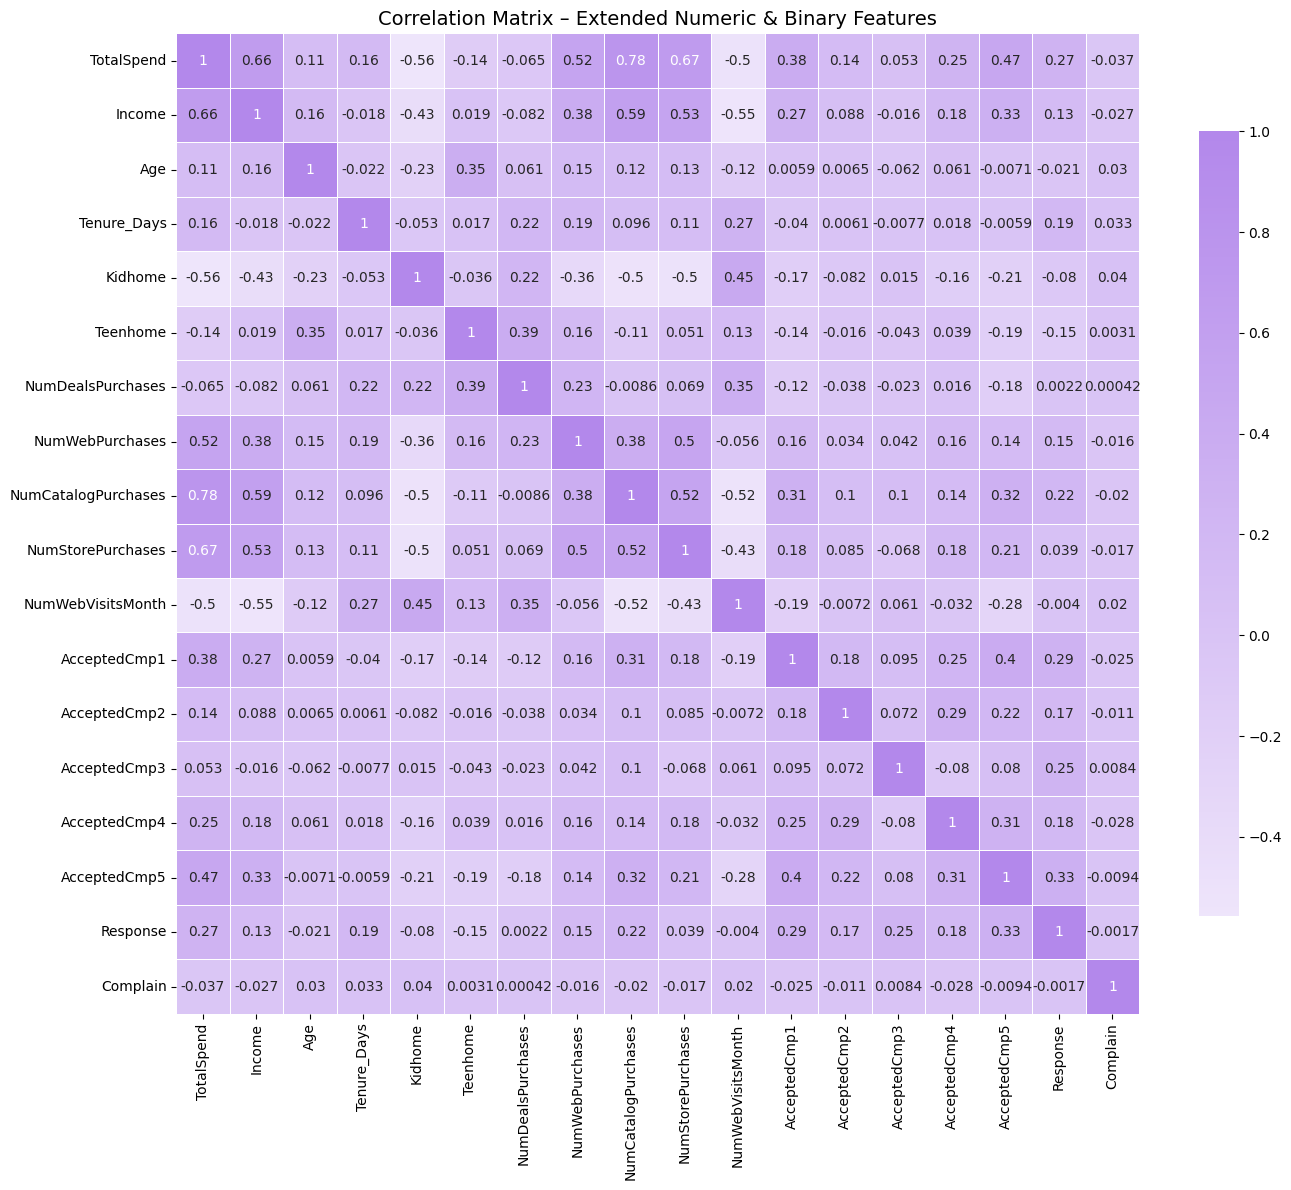

📌 Strongest correlations with TotalSpend (Spearman):
                          rho
NumCatalogPurchases  0.778577
NumStorePurchases    0.674669
Income               0.664775
Kidhome             -0.556669
NumWebPurchases      0.519837
NumWebVisitsMonth   -0.500218
AcceptedCmp5         0.470058
AcceptedCmp1         0.381523
Response             0.265298
AcceptedCmp4         0.253290
Tenure_Days          0.158814
Teenhome            -0.138384
AcceptedCmp2         0.135813
Age                  0.111306
NumDealsPurchases   -0.065112


In [143]:

from matplotlib.colors import LinearSegmentedColormap

# Columns for extended correlation analysis
corr_cols = [
    'TotalSpend',
    'Income',
    'Age',
    'Tenure_Days',
    'Kidhome',
    'Teenhome',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response',
    'Complain'
]

corr = df[corr_cols].corr()

# Custom purple colormap
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_purple',
    ['#FFFFFF', '#B388EB']
)

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    annot=True,
    cmap=custom_cmap,
    center=0,
    linewidths=0.4,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Matrix – Extended Numeric & Binary Features', fontsize=14)
plt.tight_layout()
plt.show()

print("📌 Strongest correlations with TotalSpend (Spearman):")

corr_total = (
    corr['TotalSpend']
    .drop('TotalSpend')
    .to_frame('rho')
)

corr_total['abs_rho'] = corr_total['rho'].abs()

print(
    corr_total
    .sort_values('abs_rho', ascending=False)
    .drop(columns='abs_rho')
    .head(15)
    .to_string()
)


Spearman correlation analysis indicates that purchasing behavior, particularly catalog and in-store purchases, exhibits the strongest association with TotalSpend. Income also shows a strong positive relationship. In contrast, household composition variables such as Kidhome display a notable negative association, while frequent website visits without purchases are linked to lower spending. Campaign acceptance variables show moderate positive associations, whereas age and tenure exhibit comparatively weaker effects.
Although Income shows moderate correlations with purchase frequency variables such as catalog and in-store purchases, the magnitude of these relationships remains below commonly used multicollinearity thresholds. Moreover, the variables represent distinct economic capacity and behavioral constructs, and were therefore retained for further modeling.

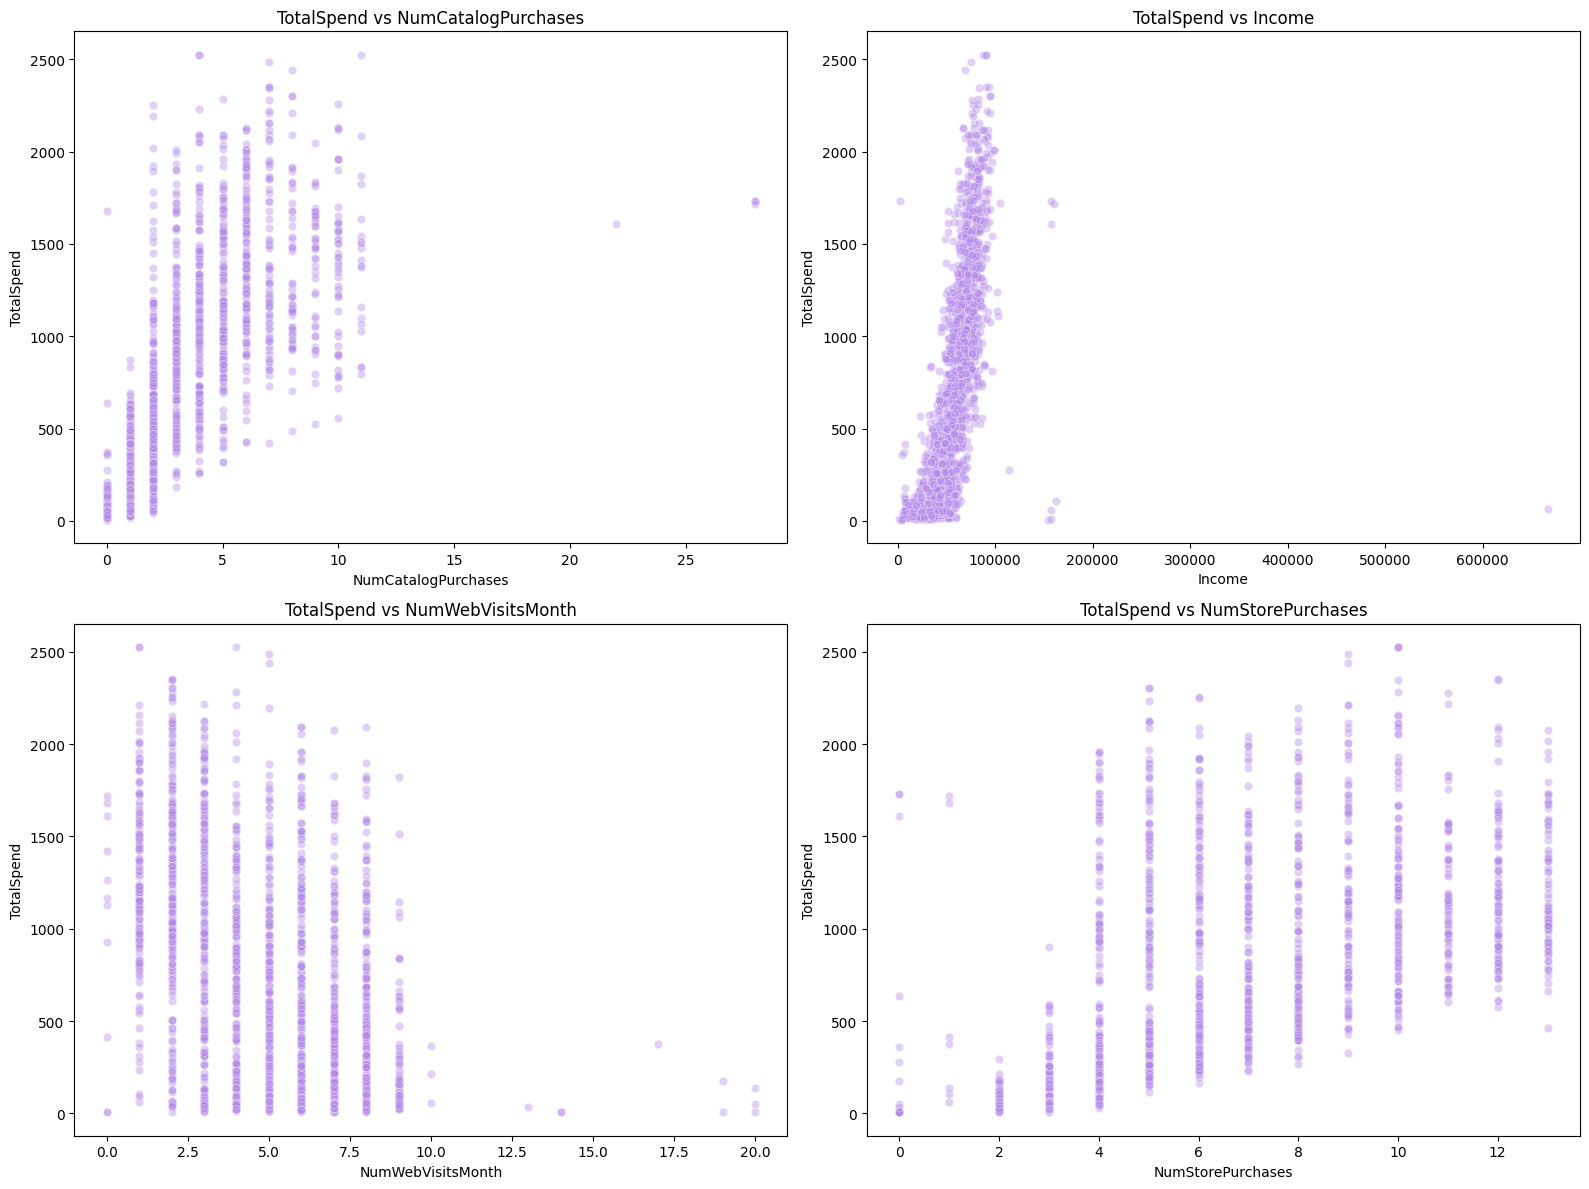

In [144]:

color = '#B388EB'

plt.figure(figsize=(16, 12))

# 1) TotalSpend vs NumCatalogPurchases
plt.subplot(2, 2, 1)
sns.scatterplot(
    x=df['NumCatalogPurchases'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs NumCatalogPurchases')

# 2) TotalSpend vs Income
plt.subplot(2, 2, 2)
sns.scatterplot(
    x=df['Income'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs Income')

# 3) TotalSpend vs NumWebVisitsMonth
plt.subplot(2, 2, 3)
sns.scatterplot(
    x=df['NumWebVisitsMonth'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs NumWebVisitsMonth')

# 4) TotalSpend vs NumStorePurchases
plt.subplot(2, 2, 4)
sns.scatterplot(
    x=df['NumStorePurchases'],
    y=df['TotalSpend'],
    alpha=0.4,
    color=color
)
plt.title('TotalSpend vs NumStorePurchases')

plt.tight_layout()
plt.show()


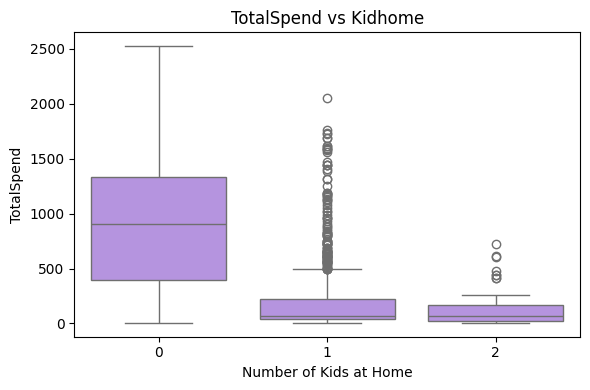

In [145]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    x=df['Kidhome'],
    y=df['TotalSpend'],
    color=color
)

plt.title('TotalSpend vs Kidhome')
plt.xlabel('Number of Kids at Home')
plt.ylabel('TotalSpend')

plt.tight_layout()
plt.show()


**Observation**
Bivariate analysis reveals that TotalSpend is strongly and positively associated with purchase frequency in catalog and store channels, while frequent website visits without purchases are linked to lower spending. Household composition, particularly the presence of children, shows a pronounced negative effect on spending. Income exhibits a positive but heteroscedastic relationship with TotalSpend, indicating that purchasing behavior mediates the effect of financial capacity.

#### Observation — Bivariate EDA (Spending Drivers)


The bivariate analysis highlights that customer spending is primarily driven by purchasing behavior rather than demographic attributes alone.

Purchase frequency in catalog and in-store channels shows the strongest positive association with TotalSpend, exhibiting clear monotonic trends. In contrast, frequent website visits without corresponding purchases are associated with lower spending, suggesting browsing behavior rather than purchasing intent.

Household composition plays a substantial role: customers with children at home display markedly lower spending levels, with heavy spenders concentrated almost exclusively among households without children.

Income demonstrates a positive but heteroscedastic relationship with TotalSpend, indicating that while higher income enables higher spending, purchasing behavior mediates this effect.

These findings suggest that behavioral features are critical predictors of TotalSpend and motivate targeted feature engineering and transformation strategies in subsequent regression modeling.


### 4.2 Feature Engineering
- Transformations (log, scaling)
- Feature selection and aggregation
- Preparation for regression models


Feature engineering for regression focused on stabilizing skewed distributions through logarithmic transformations while preserving raw behavioral signals.
Outlier treatment was intentionally deferred until after baseline model evaluation.

In [146]:

# Log-transform target
df['TotalSpend_log'] = np.log1p(df['TotalSpend'])


In [147]:
# Log-transform income
df['Income_log'] = np.log1p(df['Income'])


### 4.3 Regression Models

#### 4.3.1 Model 1 — Baseline Linear Regression (All Features, CV)

In [169]:
# ============================================================
# Model 1 — Baseline Linear Regression (All Features, CV)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # log1p(TotalSpend), created in 4.2

# ------------------------------------------------------------
# 2) Feature sets — ALL reasonable features
# ------------------------------------------------------------

num_cols = [
    "Income_log",
    "Age",
    "Tenure_Days",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
    "Complain"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_lr = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("lr", LinearRegression())
    ]
)

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    pipe_lr,
    X_train,
    y_train,
    cv=cv,
    scoring="r2"
)
r2_cv_mean = cv_scores.mean()

# ------------------------------------------------------------
# 7) Fit final model
# ------------------------------------------------------------
pipe_lr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr.predict(X_train)
y_test_pred  = pipe_lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count after OHE
# ------------------------------------------------------------
encoder = pipe_lr.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 1 — Baseline Linear Regression (All Features, CV)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 1 — Baseline Linear Regression (All Features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="All features, log target, no outlier removal"
)


📊 Model 1 — Baseline Linear Regression (All Features, CV)
R² (train): 0.882
R² (test) : 0.882
R² (CV mean): 0.874
MSE (train): 0.26
MSE (test) : 0.24
Final feature count: 27


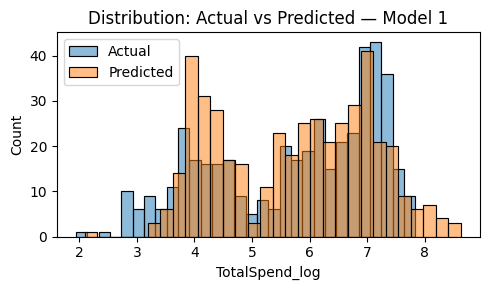

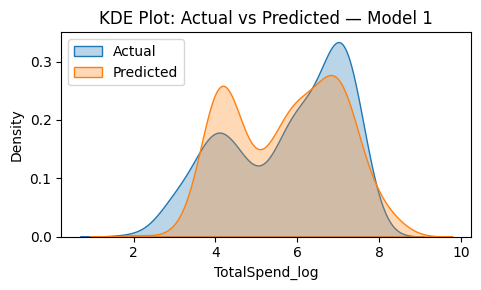

In [170]:
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 1")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 1")
plt.legend()
plt.tight_layout()
plt.show()


#### 4.3.2 Model 2 — Baseline Linear Regression

In [171]:
# ============================================================
# Model 2 — Linear Regression (EDA-based features, CV)
# ============================================================

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------
# 1) Target
# ------------------------------------------------------------
target = "TotalSpend_log"   # created in Feature Engineering (4.2)

# ------------------------------------------------------------
# 2) Feature sets (EDA-based)
# ------------------------------------------------------------
num_cols = [
    "Income_log",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebPurchases",
    "NumWebVisitsMonth",
    "Kidhome",
    "Tenure_Days",
    "Age"
]

cat_cols = [
    "Education_Level",
    "Marital_Status",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp4",
    "Response"
]

X = df[num_cols + cat_cols].copy()
y = df[target].copy()

# ------------------------------------------------------------
# 3) Train/Test split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# 4) Preprocessor
# ------------------------------------------------------------
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
])

# ------------------------------------------------------------
# 5) Pipeline
# ------------------------------------------------------------
pipe_lr = Pipeline([
    ("pre", preprocessor),
    ("lr", LinearRegression())
])

# ------------------------------------------------------------
# 6) Cross-validation (train only)
# ------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring="r2")
r2_cv_mean = cv_scores.mean()

# ------------------------------------------------------------
# 7) Fit final model
# ------------------------------------------------------------
pipe_lr.fit(X_train, y_train)

# ------------------------------------------------------------
# 8) Predictions & metrics
# ------------------------------------------------------------
y_train_pred = pipe_lr.predict(X_train)
y_test_pred  = pipe_lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# ------------------------------------------------------------
# 9) Feature count after OHE
# ------------------------------------------------------------
encoder = pipe_lr.named_steps["pre"].transformers_[1][1]
cat_feature_counts = [len(cats) - 1 for cats in encoder.categories_]
feature_count = len(num_cols) + sum(cat_feature_counts)

# ------------------------------------------------------------
# 10) Report
# ------------------------------------------------------------
print("📊 Model 2 — Linear Regression (EDA-based features, CV)")
print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"R² (CV mean): {r2_cv_mean:.3f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test) : {mse_test:.2f}")
print(f"Final feature count: {feature_count}")

# ------------------------------------------------------------
# 11) Log results
# ------------------------------------------------------------
log_model_result(
    name="Model 2 — Linear Regression (EDA-based features)",
    r2_train=r2_train,
    r2_test=r2_test,
    mse_train=mse_train,
    mse_test=mse_test,
    r2_cv=r2_cv_mean,
    feature_count=feature_count,
    notes="Log target, EDA-based features, no outlier removal"
)


📊 Model 2 — Linear Regression (EDA-based features, CV)
R² (train): 0.867
R² (test) : 0.865
R² (CV mean): 0.860
MSE (train): 0.29
MSE (test) : 0.27
Final feature count: 21


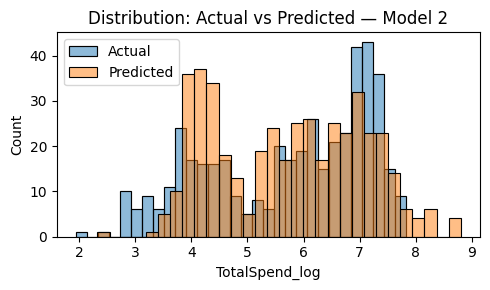

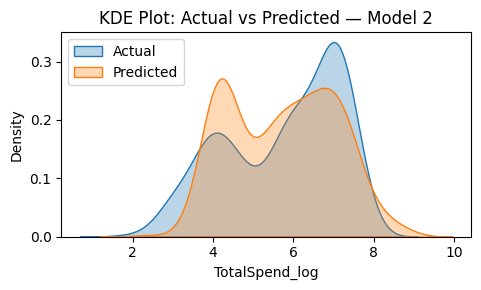

In [172]:
plt.figure(figsize=(5, 3))
sns.histplot(y_test, label="Actual", bins=30, alpha=0.5)
sns.histplot(y_test_pred, label="Predicted", bins=30, alpha=0.5)
plt.title("Distribution: Actual vs Predicted — Model 2")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.kdeplot(y_test, label="Actual", fill=True, alpha=0.3)
sns.kdeplot(y_test_pred, label="Predicted", fill=True, alpha=0.3)
plt.title("KDE Plot: Actual vs Predicted — Model 2")
plt.legend()
plt.tight_layout()
plt.show()


### 📋 Regression Models — Final Summary (Generic & Scalable)

In [173]:
# ============================================
# 📋 Regression Models – Final Summary
# ============================================

import pandas as pd

# Build summary DataFrame from model_log
df_summary = pd.DataFrame(model_log)

# Select and order key columns (safe if more columns exist)
summary_cols = [
    "Model",
    "R²_train",
    "R²_test",
    "R²_CV",
    "MSE_train",
    "MSE_test",
    "Feature_count"
]

df_summary = df_summary[summary_cols]


print("📊 Summary of All Regression Models:")
display(df_summary)


📊 Summary of All Regression Models:


,Model,R²_train,R²_test,R²_CV,MSE_train,MSE_test,Feature_count
0,Model 1 — Baseline Linear Regression (All Feat...,0.882,0.882,0.874,0.26,0.24,27
1,Model 2 — Linear Regression (EDA-based features),0.867,0.865,0.860,0.29,0.27,21


In [174]:
print("🏆 Models Sorted by Test R² (descending):")
display(
    df_summary
    .sort_values(by="R²_test", ascending=False)
    .reset_index(drop=True)
)


🏆 Models Sorted by Test R² (descending):


,Model,R²_train,R²_test,R²_CV,MSE_train,MSE_test,Feature_count
0,Model 1 — Baseline Linear Regression (All Feat...,0.882,0.882,0.874,0.26,0.24,27
1,Model 2 — Linear Regression (EDA-based features),0.867,0.865,0.860,0.29,0.27,21
